In [16]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np

In [7]:
path = '../data/fifa-18-demo-player-dataset/'

In [19]:
footballers = pd.read_csv(path+'CompleteDataset.csv',index_col=0,encoding='utf-8')

In [20]:
footballers.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
footballers['Unit'] = footballers['Value'].str[-1]
footballers['Value (M)'] = np.where(footballers['Unit'] == '0', 0, 
                                    footballers['Value'].str[1:-1].replace(r'[a-zA-Z]',''))
footballers['Value (M)'] = footballers['Value (M)'].astype(float)
footballers['Value (M)'] = np.where(footballers['Unit'] == 'M', 
                                    footballers['Value (M)'], 
                                    footballers['Value (M)']/1000)
footballers = footballers.assign(Value=footballers['Value (M)'],
                                 Position=footballers['Preferred Positions'].str.split().str[0])

#### Multi-Variate Scatter Plots

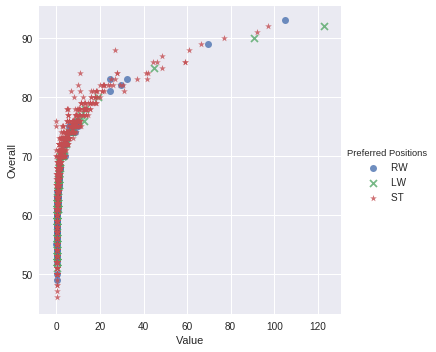

In [27]:
sns.lmplot(x='Value',y='Overall',hue='Preferred Positions',markers=['o','x','*'],
           data=footballers.loc[footballers['Preferred Positions'].isin(['ST ', 'RW ', 'LW '])],
          fit_reg=False)

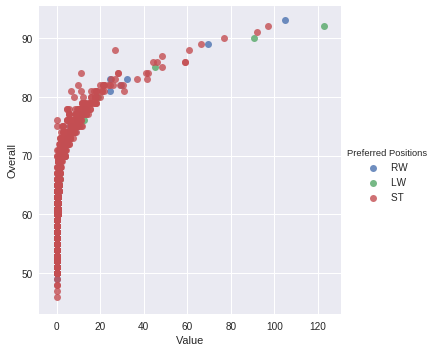

In [28]:
sns.lmplot(x='Value',y='Overall',hue='Preferred Positions',
           data=footballers.loc[footballers['Preferred Positions'].isin(['ST ', 'RW ', 'LW '])],
          fit_reg=False)

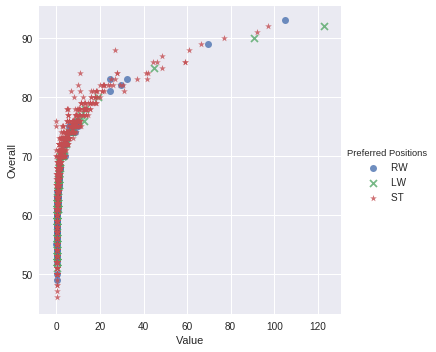

In [29]:
sns.lmplot(x='Value',y='Overall',hue='Preferred Positions',markers=['o','x','*'],
           data=footballers.loc[footballers['Preferred Positions'].isin(['ST ', 'RW ', 'LW '])],
          fit_reg=False)

#### Grouped Box Plots

In [37]:
f = footballers.loc[footballers['Preferred Positions'].isin(['ST ','GK '])]
f = f.loc[:,['Value','Overall','Aggression','Preferred Positions']]

In [38]:
f.head()

,Value,Overall,Aggression,Preferred Positions
3,97.0,92,78,ST
4,61.0,92,29,GK
5,92.0,91,80,ST
6,64.5,90,38,GK
9,77.0,90,50,ST


In [39]:
f = f.loc[(f['Overall']>=80) & (f['Overall']<85)]

In [40]:
f.head()

,Value,Overall,Aggression,Preferred Positions
100,42.0,84,55,ST
101,41.0,84,54,ST
103,31.0,84,41,GK
110,26.0,84,35,GK
113,28.0,84,51,ST


In [42]:
f.Aggression = f['Aggression'].astype(float)

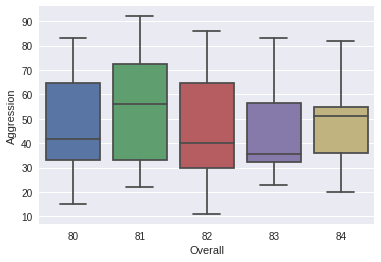

In [43]:
sns.boxplot(x='Overall',y='Aggression',data=f)

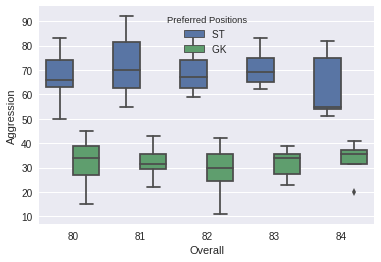

In [45]:
sns.boxplot(x='Overall',y='Aggression',data=f,hue='Preferred Positions')

In [ ]:
#### Summarization

##### Heatmap

In [56]:
footballers[['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control']].isnull().sum()

Acceleration    0
Aggression      0
Agility         0
Balance         0
Ball control    0
dtype: int64

In [65]:
f = (footballers.loc[:,['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control']]
     .applymap(lambda v: int(v) if str.isdigit(str(v)) else np.nan)
     .dropna()).corr()

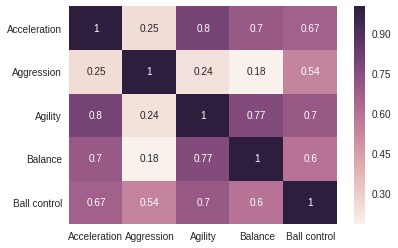

In [67]:
sns.heatmap(f,annot=True)

#### Parallel Coordinates

In [68]:
from pandas.plotting import parallel_coordinates

In [85]:
f = (footballers.iloc[:,12:17]
            .loc[footballers['Preferred Positions'].isin(['ST ','GK '])]
            .applymap(lambda v: int(v) if str.isdigit(str(v)) else np.nan)
            .dropna())

In [86]:
print(f.shape)
f.head()

(3836, 5)


,Acceleration,Aggression,Agility,Balance,Ball control
3,88.0,78.0,86.0,60.0,91.0
4,58.0,29.0,52.0,35.0,48.0
5,79.0,80.0,78.0,80.0,89.0
6,57.0,38.0,60.0,43.0,42.0
9,78.0,50.0,75.0,69.0,85.0


In [87]:
f['Preferred Positions'] = footballers['Preferred Positions']

In [89]:
print(f.shape)
f.head()

(3836, 6)


,Acceleration,Aggression,Agility,Balance,Ball control,Preferred Positions
3,88.0,78.0,86.0,60.0,91.0,ST
4,58.0,29.0,52.0,35.0,48.0,GK
5,79.0,80.0,78.0,80.0,89.0,ST
6,57.0,38.0,60.0,43.0,42.0,GK
9,78.0,50.0,75.0,69.0,85.0,ST


In [90]:
f = f.sample(200)

In [81]:
f.shape

(200, 6)

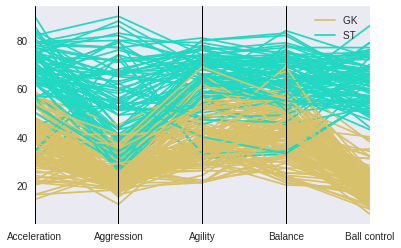

In [84]:
parallel_coordinates(f,'Preferred Positions')